In [1]:
#Imports
import pandas as pd
import pickle
import os
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
import lda
import pandas as pd
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

In [1]:
#%pip install lda

  Created wheel for lda: filename=lda-2.0.0-cp38-cp38-win_amd64.whl size=346338 sha256=9f1a44fcee7b2548716e469505228f906a751b0e584cd06bdcaf804a19283a87
  Stored in directory: c:\users\louis\appdata\local\pip\cache\wheels\bf\64\c8\595c54dbccb82a2c7e46b0759030acc8770781a6ec547e0c53
Successfully built lda
Note: you may need to restart the kernel to use updated packages.


In [217]:
#Import soptify + genius dataset with song lyrics
df_lyrics = pd.read_pickle("df_rap_provisional.pickle")

In [218]:
df_lyrics.head()

,track_id,album_id,artist_id,duration_ms,flg_explicit,url,track_name,track_popularity,track_type,track_danceability,...,artist_followers,artist_popularity,lyrics,lyrics_clean,lyrics_clean_split,lyrics_wordlen,genre_rap,genre_hip_hop,track_release_year,track_release_decade
0,5DJNyvuMmZfsfvdTpMMmUq,08IW6sUfN9fRYG8Xlgm4oC,1ShZZUjkbXCjhwrb18BA8I,252546,True,https://api.spotify.com/v1/tracks/5DJNyvuMmZfs...,Sour Patch Kids,70,track,0.523,...,431943,71,"When I was growing up, I had a lot of dreams, ...",growing lot dreams momma told son could anythi...,"[growing, lot, dreams, momma, told, son, could...",251,1,0,2014,10
1,1uZXf9hQR1zkh1TPIGbuFP,6O24vHd68xPWQZGU9ppv7G,4hxDvVq5t8ebPYPdBl1F9f,274384,True,https://api.spotify.com/v1/tracks/1uZXf9hQR1zk...,Sangre Por Sangre (Blood For Blood),41,track,0.509,...,571234,55,"Sangre por sangre, blood for blood\nSangre por...",sangre por sangre blood blood sangre por sangr...,"[sangre, por, sangre, blood, blood, sangre, po...",206,1,0,2014,10
2,4MJfCOcc2PpWOrUqOpvy1S,5UOImThFBmntV6lpCllNFU,1ShZZUjkbXCjhwrb18BA8I,228610,True,https://api.spotify.com/v1/tracks/4MJfCOcc2PpW...,Sunflower Seeds,63,track,0.723,...,431943,71,40 ounces and a pack of ranch sunflower seeds\...,ounces pack ranch sunflower seeds answers ques...,"[ounces, pack, ranch, sunflower, seeds, answer...",212,1,0,2016,10
3,0fCwrjKfWxF3xQhZrYUw4T,6n9DKpOxwifT5hOXtgLZSL,4MCBfE4596Uoi2O4DtmEMz,154767,True,https://api.spotify.com/v1/tracks/0fCwrjKfWxF3...,Blood On My Jeans,75,track,0.868,...,21026508,94,"Ah\nDamn, I tried to stop, oh\nBaby (808 Mafia...",damn tried stop baby mafia baby baby baby baby...,"[damn, tried, stop, baby, mafia, baby, baby, b...",242,2,0,2020,20
4,0P9lyICk63dqZSqXV2HBP0,24i8TDxRtaHGSDiWjVyseC,4qXC0i02bSFstECuXP2ZpL,170702,True,https://api.spotify.com/v1/tracks/0P9lyICk63dq...,About You,67,track,0.644,...,227241,76,Ayy\n\nI need you to be about we (We)\nIf you ...,ayy need put limit love count girl know selfis...,"[ayy, need, put, limit, love, count, girl, kno...",212,1,0,2021,20


In [219]:
#Create lemmatier, stemmer and define stopwords
wordnet_lemmatizer = WordNetLemmatizer()

stemmer = PorterStemmer()

stopwords_nltk = set(stopwords.words('english'))



In [220]:
#Save lyrics
temp = df_lyrics["lyrics_clean"]

In [221]:
#Remove non-english words from lyrics
#Potential issue: getting rid of slang words that are common in rap
words = set(nltk.corpus.words.words())

def remove_foreign(t):
    return " ".join(w for w in nltk.wordpunct_tokenize(t) if w.lower() in words or not w.isalpha())

In [222]:
df_lyrics["lyrics_clean"] = temp.apply(remove_foreign)
df_lyrics["lyrics_clean"]

0       growing lot told son could anything long sprea...
1       blood blood blood blood blood blood blood bloo...
2       pack ranch sunflower later got nowhere crew up...
3       damn tried stop baby baby baby baby baby babe ...
4       need put limit love count girl know selfish wa...
                              ...                        
2462    hey hey mike made hey hey hey done seen floor ...
2463    think time think may need mine hate say know l...
2464    yeah yeah yeah yeah yeah say love know forget ...
2465    must thousand million hear moving street read ...
2466    feel better hold one get bumpy ten hell bent h...
Name: lyrics_clean, Length: 2467, dtype: object

In [223]:
# Define tokenizer function for CountVectorizer
def tokenize_text(raw_text):
    text = raw_text.lower()
    tokens = word_tokenizer.tokenize(text)
    return tokens

In [301]:
# Define tokenizer + lemmatizer function for CountVectorizer
def tokenize_text_lemma(raw_text):
    lowercase = raw_text.lower()  
    tokens = word_tokenizer.tokenize(lowercase)
    lemmed_text = [wordnet_lemmatizer.lemmatize(i) for i in tokens]

    return lemmed_text

In [307]:
# Define tokenizer + stemmer function for CountVectorizer

def tokenize_text_stem(raw_text):
    lowercase = raw_text.lower()
    tokens = word_tokenizer.tokenize(lowercase)
    stemmed_text = [stemmer.stem(i) for i in tokens ]

    return stemmed_text

In [482]:
#Function to vectorize lyrics
def vectorize_lyrics(df, tokenizer):
    vectorizer = CountVectorizer(tokenizer = tokenizer, stop_words = stopwords_nltk, decode_error="ignore")
    total_words = vectorizer.fit_transform(df["lyrics_clean"])
    return total_words, vectorizer

In [483]:
words_all_songs, vectorizer = vectorize_lyrics(df_lyrics, tokenize_text_lemma)

In [409]:
print(words_all_songs.shape)


(2467, 10842)


In [487]:
#Function to run LDA for lyrics
#Args are: dataframe with songs, vectorized lyrics, number of topics
#Returns all topic scores and topic scores for artists

def get_topics(df, lyrics, ntopics, vectorizer):
    model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
    model.fit(lyrics)
    
    #Word-Topic distributions
    topic_word = model.topic_word_
    
    #Document-Topic distributions
    doc_topic = model.doc_topic_
    doc_topic = pd.DataFrame(doc_topic)

    #Join topic distributions to song dataframe
    df = df.join(doc_topic)

    # Define dataframe to see topics by artist
    artists = pd.DataFrame()
    
    #Group topics by artist - aggregate using mean
    for i in range(int(ntopics)):
        topic="topic_"+str(i)
        artists[topic]=df_lyrics_copy.groupby(["artist_name"])[i].mean()
        
    # Word-Topic dataframe
    topics = pd.DataFrame(topic_word)
    
    topics.columns = vectorizer.get_feature_names_out()
    
    topics_transpose = topics.transpose()

    return topics_transpose, artists

In [424]:
topics_all_songs, artists_all_songs = get_topics(df_lyrics, words_all_songs, 10, vectorizer)

INFO:lda:n_documents: 2467
INFO:lda:vocab_size: 10842
INFO:lda:n_words: 405414
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -3985906
INFO:lda:<10> log likelihood: -3257629
INFO:lda:<20> log likelihood: -3153222
INFO:lda:<30> log likelihood: -3115668
INFO:lda:<40> log likelihood: -3096341
INFO:lda:<50> log likelihood: -3082102
INFO:lda:<60> log likelihood: -3071116
INFO:lda:<70> log likelihood: -3064407
INFO:lda:<80> log likelihood: -3057926
INFO:lda:<90> log likelihood: -3055260
INFO:lda:<100> log likelihood: -3050612
INFO:lda:<110> log likelihood: -3047114
INFO:lda:<120> log likelihood: -3042921
INFO:lda:<130> log likelihood: -3038387
INFO:lda:<140> log likelihood: -3037414
INFO:lda:<150> log likelihood: -3035824
INFO:lda:<160> log likelihood: -3034002
INFO:lda:<170> log likelihood: -3033016
INFO:lda:<180> log likelihood: -3030670
INFO:lda:<190> log likelihood: -3028765
INFO:lda:<200> log likelihood: -3027650
INFO:lda:<210> log likelihood: -3027388
INFO:lda:

In [430]:
#Function to sort topic coeffs by importance 
#Args are: dataframe of topics
#Returns a dict with list of sorted coeffs as values
def get_sorted_coeffs(topics):
    topics_sorted_dict = {}

    for i in range(len(topics.columns)):
        topics_sorted_dict[i] = topics.iloc[:,i].sort_values(ascending=False)
    
    return topics_sorted_dict

In [431]:
topics_sorted_all_songs = get_sorted_coeffs(topics_all_songs)

<AxesSubplot:>

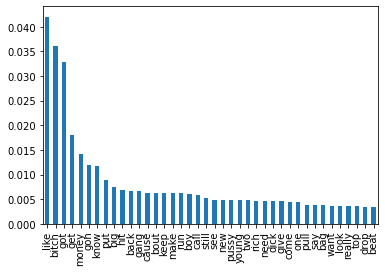

In [450]:
topics_sorted_all_songs[1].head(40).plot.bar()

In [329]:
#Excel exports if we want to

#topics_transpose.to_excel("topic_word_dist.xlsx")
#atists.to_excel("artists_topic_dist.xlsx",index=False)

In [451]:
artists_all_songs.head(20)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
artist_name,,,,,,,,,,
$NOT,0.158674,0.361561,0.012567,0.018927,0.181608,0.021825,0.036360,0.058357,0.117131,0.032990
$ilkMoney,0.202083,0.493750,0.014583,0.000694,0.000694,0.000694,0.104861,0.000694,0.181250,0.000694
$uicideboy$,0.066304,0.055435,0.001087,0.001087,0.251087,0.077174,0.077174,0.316304,0.153261,0.001087
070 Shake,0.131079,0.027012,0.055031,0.022349,0.282459,0.055425,0.046429,0.006220,0.191312,0.182684
10 Years,0.001619,0.017004,0.033459,0.030192,0.480001,0.026982,0.057799,0.282080,0.041465,0.029397
12 Stones,0.000909,0.100909,0.000909,0.000909,0.491818,0.000909,0.000909,0.400909,0.000909,0.000909
2 Chainz,0.233701,0.402541,0.000437,0.052029,0.036195,0.066802,0.148163,0.028586,0.027760,0.003787
21 Savage,0.121006,0.429162,0.012349,0.038212,0.050706,0.010500,0.230216,0.024548,0.060318,0.022984
22Gz,0.000474,0.834597,0.000474,0.000474,0.000474,0.000474,0.066825,0.095261,0.000474,0.000474


# Topics by 5-year segments

Oldest release was in 1983. Newest release was in 2021


In [506]:
#Function to get a dict containing epoch end and start year
#Args: dataframe with songs, number of years in epoch
#Returns: dict with lists [start year, end_year] as values

#TO IMPROVE: make it so last epoch is as short as it can be instead of full 5
def get_epochs(df, num_years):
    min_year = df.track_release_year.min()
    max_year = df.track_release_year.max()

    i = 0
    dict_epoch = {}
    counter = max_year
    temp_min = min_year

    while counter >= min_year:
        temp_list = []

        dict_epoch[i] = temp_list

        i += 1


        temp_list.insert(1, counter)
        counter -= num_years
        temp_list.insert(0, counter + 1)

        continue

    num_epochs = i
    
    print(f"Oldest release was in {min_year}. Newest release was in {max_year}")
    
    print(f"There are {num_epochs} epochs of 5 years.")
    
    return dict_epoch

In [507]:
dict_epoch_all_songs = get_epochs(df_lyrics, 5)

Oldest release was in 1983. Newest release was in 2021
There are 8 epochs of 5 years.


In [508]:
dict_epoch_all_songs

{0: [2017, 2021],
 1: [2012, 2016],
 2: [2007, 2011],
 3: [2002, 2006],
 4: [1997, 2001],
 5: [1992, 1996],
 6: [1987, 1991],
 7: [1982, 1986]}

In [510]:
# Get topics by epoch

topic_dict_list = []
artists_df_list = []
for i in range(len(dict_epoch_all_songs)):
    
    #Only get songs for that epoch
    df_temp = df_lyrics[(df_lyrics.track_release_year >= dict_epoch_all_songs[i][0])
                        & (df_lyrics.track_release_year <= dict_epoch_all_songs[i][1])]
    
    #Check to see how many songs are in df
    print(f"There are {len(df_temp)} songs in epoch {i}: {dict_epoch_all_songs[i][0]} to {dict_epoch_all_songs[i][1]}")
    
    #Break loop if df is empty
    if df_temp.empty:
        print('Break: no songs')
        
    #Vectorize lyrics
    vec_lyrics, vectorizer = vectorize_lyrics(df_temp, tokenize_text_lemma)
    
    #Get topics and artists df
    temp_topics, temp_artists = get_topics(df_temp, vec_lyrics, 10, vectorizer)
    
    #Sort topic coeffs
    temp_topics_sorted = get_sorted_coeffs(temp_topics)
    
    topic_dict_list.append(temp_topics_sorted)
    artists_df_list.append(temp_artists)

There are 1381 songs in epoch 0: 2017 to 2021


INFO:lda:n_documents: 1381
INFO:lda:vocab_size: 8534
INFO:lda:n_words: 236054
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -2319240
INFO:lda:<10> log likelihood: -1889728
INFO:lda:<20> log likelihood: -1829388
INFO:lda:<30> log likelihood: -1806093
INFO:lda:<40> log likelihood: -1793058
INFO:lda:<50> log likelihood: -1785324
INFO:lda:<60> log likelihood: -1781587
INFO:lda:<70> log likelihood: -1776257
INFO:lda:<80> log likelihood: -1772901
INFO:lda:<90> log likelihood: -1770703
INFO:lda:<100> log likelihood: -1770087
INFO:lda:<110> log likelihood: -1767776
INFO:lda:<120> log likelihood: -1767394
INFO:lda:<130> log likelihood: -1765135
INFO:lda:<140> log likelihood: -1762512
INFO:lda:<150> log likelihood: -1762679
INFO:lda:<160> log likelihood: -1761859
INFO:lda:<170> log likelihood: -1760497
INFO:lda:<180> log likelihood: -1759664
INFO:lda:<190> log likelihood: -1759428
INFO:lda:<200> log likelihood: -1758042
INFO:lda:<210> log likelihood: -1757559
INFO:lda:<

There are 455 songs in epoch 1: 2012 to 2016


INFO:lda:n_documents: 455
INFO:lda:vocab_size: 5426
INFO:lda:n_words: 79755
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -799270
INFO:lda:<10> log likelihood: -615757
INFO:lda:<20> log likelihood: -600421
INFO:lda:<30> log likelihood: -594372
INFO:lda:<40> log likelihood: -590536
INFO:lda:<50> log likelihood: -588390
INFO:lda:<60> log likelihood: -587232
INFO:lda:<70> log likelihood: -585705
INFO:lda:<80> log likelihood: -584248
INFO:lda:<90> log likelihood: -583335
INFO:lda:<100> log likelihood: -583017
INFO:lda:<110> log likelihood: -582197
INFO:lda:<120> log likelihood: -581379
INFO:lda:<130> log likelihood: -581098
INFO:lda:<140> log likelihood: -581668
INFO:lda:<150> log likelihood: -580767
INFO:lda:<160> log likelihood: -580590
INFO:lda:<170> log likelihood: -579655
INFO:lda:<180> log likelihood: -579321
INFO:lda:<190> log likelihood: -579678
INFO:lda:<200> log likelihood: -579166
INFO:lda:<210> log likelihood: -578824
INFO:lda:<220> log likelihood: -57

There are 188 songs in epoch 2: 2007 to 2011


INFO:lda:<0> log likelihood: -307936
INFO:lda:<10> log likelihood: -222708
INFO:lda:<20> log likelihood: -217181
INFO:lda:<30> log likelihood: -214663
INFO:lda:<40> log likelihood: -213619
INFO:lda:<50> log likelihood: -212845
INFO:lda:<60> log likelihood: -212485
INFO:lda:<70> log likelihood: -211947
INFO:lda:<80> log likelihood: -211636
INFO:lda:<90> log likelihood: -211569
INFO:lda:<100> log likelihood: -211064
INFO:lda:<110> log likelihood: -210973
INFO:lda:<120> log likelihood: -210596
INFO:lda:<130> log likelihood: -210672
INFO:lda:<140> log likelihood: -210562
INFO:lda:<150> log likelihood: -209914
INFO:lda:<160> log likelihood: -210065
INFO:lda:<170> log likelihood: -210083
INFO:lda:<180> log likelihood: -209751
INFO:lda:<190> log likelihood: -209751
INFO:lda:<200> log likelihood: -209713
INFO:lda:<210> log likelihood: -209588
INFO:lda:<220> log likelihood: -209695
INFO:lda:<230> log likelihood: -209740
INFO:lda:<240> log likelihood: -209682
INFO:lda:<250> log likelihood: -2095

There are 193 songs in epoch 3: 2002 to 2006


INFO:lda:<0> log likelihood: -278603
INFO:lda:<10> log likelihood: -199055
INFO:lda:<20> log likelihood: -194605
INFO:lda:<30> log likelihood: -193185
INFO:lda:<40> log likelihood: -192067
INFO:lda:<50> log likelihood: -191402
INFO:lda:<60> log likelihood: -191075
INFO:lda:<70> log likelihood: -190452
INFO:lda:<80> log likelihood: -190317
INFO:lda:<90> log likelihood: -190118
INFO:lda:<100> log likelihood: -189846
INFO:lda:<110> log likelihood: -189670
INFO:lda:<120> log likelihood: -189604
INFO:lda:<130> log likelihood: -189538
INFO:lda:<140> log likelihood: -189333
INFO:lda:<150> log likelihood: -189197
INFO:lda:<160> log likelihood: -188973
INFO:lda:<170> log likelihood: -189048
INFO:lda:<180> log likelihood: -189093
INFO:lda:<190> log likelihood: -188737
INFO:lda:<200> log likelihood: -188818
INFO:lda:<210> log likelihood: -188988
INFO:lda:<220> log likelihood: -188843
INFO:lda:<230> log likelihood: -188602
INFO:lda:<240> log likelihood: -188941
INFO:lda:<250> log likelihood: -1885

There are 155 songs in epoch 4: 1997 to 2001


INFO:lda:<20> log likelihood: -128892
INFO:lda:<30> log likelihood: -127361
INFO:lda:<40> log likelihood: -126440
INFO:lda:<50> log likelihood: -125799
INFO:lda:<60> log likelihood: -125432
INFO:lda:<70> log likelihood: -125244
INFO:lda:<80> log likelihood: -125228
INFO:lda:<90> log likelihood: -125170
INFO:lda:<100> log likelihood: -124526
INFO:lda:<110> log likelihood: -124840
INFO:lda:<120> log likelihood: -124484
INFO:lda:<130> log likelihood: -124511
INFO:lda:<140> log likelihood: -124576
INFO:lda:<150> log likelihood: -124402
INFO:lda:<160> log likelihood: -124280
INFO:lda:<170> log likelihood: -124267
INFO:lda:<180> log likelihood: -124196
INFO:lda:<190> log likelihood: -123971
INFO:lda:<200> log likelihood: -123900
INFO:lda:<210> log likelihood: -123837
INFO:lda:<220> log likelihood: -123965
INFO:lda:<230> log likelihood: -123901
INFO:lda:<240> log likelihood: -123951
INFO:lda:<250> log likelihood: -124045
INFO:lda:<260> log likelihood: -123745
INFO:lda:<270> log likelihood: -1

There are 55 songs in epoch 5: 1992 to 1996


INFO:lda:<50> log likelihood: -54997
INFO:lda:<60> log likelihood: -54773
INFO:lda:<70> log likelihood: -54776
INFO:lda:<80> log likelihood: -54593
INFO:lda:<90> log likelihood: -54477
INFO:lda:<100> log likelihood: -54268
INFO:lda:<110> log likelihood: -54266
INFO:lda:<120> log likelihood: -54161
INFO:lda:<130> log likelihood: -54138
INFO:lda:<140> log likelihood: -54116
INFO:lda:<150> log likelihood: -53957
INFO:lda:<160> log likelihood: -54057
INFO:lda:<170> log likelihood: -53867
INFO:lda:<180> log likelihood: -53761
INFO:lda:<190> log likelihood: -53949
INFO:lda:<200> log likelihood: -53853
INFO:lda:<210> log likelihood: -53785
INFO:lda:<220> log likelihood: -53899
INFO:lda:<230> log likelihood: -53702
INFO:lda:<240> log likelihood: -53799
INFO:lda:<250> log likelihood: -53837
INFO:lda:<260> log likelihood: -53889
INFO:lda:<270> log likelihood: -53820
INFO:lda:<280> log likelihood: -53890
INFO:lda:<290> log likelihood: -53881
INFO:lda:<300> log likelihood: -53780
INFO:lda:<310> lo

There are 29 songs in epoch 6: 1987 to 1991


INFO:lda:<60> log likelihood: -28055
INFO:lda:<70> log likelihood: -28000
INFO:lda:<80> log likelihood: -27890
INFO:lda:<90> log likelihood: -27786
INFO:lda:<100> log likelihood: -27916
INFO:lda:<110> log likelihood: -27823
INFO:lda:<120> log likelihood: -27804
INFO:lda:<130> log likelihood: -27770
INFO:lda:<140> log likelihood: -27804
INFO:lda:<150> log likelihood: -27733
INFO:lda:<160> log likelihood: -27723
INFO:lda:<170> log likelihood: -27674
INFO:lda:<180> log likelihood: -27596
INFO:lda:<190> log likelihood: -27710
INFO:lda:<200> log likelihood: -27668
INFO:lda:<210> log likelihood: -27606
INFO:lda:<220> log likelihood: -27658
INFO:lda:<230> log likelihood: -27725
INFO:lda:<240> log likelihood: -27681
INFO:lda:<250> log likelihood: -27685
INFO:lda:<260> log likelihood: -27643
INFO:lda:<270> log likelihood: -27614
INFO:lda:<280> log likelihood: -27624
INFO:lda:<290> log likelihood: -27671
INFO:lda:<300> log likelihood: -27602
INFO:lda:<310> log likelihood: -27737
INFO:lda:<320> l

There are 11 songs in epoch 7: 1982 to 1986


INFO:lda:<70> log likelihood: -9160
INFO:lda:<80> log likelihood: -9166
INFO:lda:<90> log likelihood: -9078
INFO:lda:<100> log likelihood: -9095
INFO:lda:<110> log likelihood: -9056
INFO:lda:<120> log likelihood: -9069
INFO:lda:<130> log likelihood: -9025
INFO:lda:<140> log likelihood: -9020
INFO:lda:<150> log likelihood: -9019
INFO:lda:<160> log likelihood: -9015
INFO:lda:<170> log likelihood: -9085
INFO:lda:<180> log likelihood: -9062
INFO:lda:<190> log likelihood: -9053
INFO:lda:<200> log likelihood: -8998
INFO:lda:<210> log likelihood: -9020
INFO:lda:<220> log likelihood: -9042
INFO:lda:<230> log likelihood: -9058
INFO:lda:<240> log likelihood: -9009
INFO:lda:<250> log likelihood: -9000
INFO:lda:<260> log likelihood: -9005
INFO:lda:<270> log likelihood: -9029
INFO:lda:<280> log likelihood: -8992
INFO:lda:<290> log likelihood: -9018
INFO:lda:<300> log likelihood: -9010
INFO:lda:<310> log likelihood: -9032
INFO:lda:<320> log likelihood: -8992
INFO:lda:<330> log likelihood: -9017
INFO

In [505]:
df_lyrics.track_release_year.value_counts()

2020    381
2018    285
2021    279
2019    273
2016    170
2017    163
2015     91
2014     80
2012     61
2011     56
2005     53
2013     53
2004     50
2003     47
2000     45
2001     45
2010     43
2008     33
2009     30
2007     26
1999     25
2002     25
1997     23
1992     22
2006     18
1998     17
1995     13
1994     10
1987      9
1986      9
1996      7
1989      7
1988      5
1990      4
1991      4
1993      3
1985      1
1983      1
Name: track_release_year, dtype: int64

In [ ]:
df_test = df_lyrics[(df_lyrics.track_release_year > 19)
                        & (df_lyrics.track_release_year <= dict_epoch_all_songs[i][1])]

In [491]:
topic_dict_list[0][0]

got          5.621826e-02
like         5.244459e-02
know         3.244739e-02
yeah         2.715781e-02
want         2.183598e-02
                 ...     
godly        3.225355e-07
godfather    3.225355e-07
goddard      3.225355e-07
goblin       3.225355e-07
aback        3.225355e-07
Name: 0, Length: 8534, dtype: float64

In [492]:
topic_dict_list[1][0]

like         5.423785e-02
bitch        5.293094e-02
got          3.939505e-02
money        3.538096e-02
young        1.699081e-02
                 ...     
get          9.335098e-07
german       9.335098e-07
ger          9.335098e-07
gentleman    9.335098e-07
zoo          9.335098e-07
Name: 0, Length: 5426, dtype: float64

In [493]:
topic_dict_list[2][0]

tonight       0.055470
let           0.054244
good          0.049647
night         0.040760
yeah          0.034018
                ...   
friction      0.000003
friend        0.000003
friendship    0.000003
frightened    0.000003
zone          0.000003
Name: 0, Length: 3123, dtype: float64

In [499]:
artists_df_list[0].loc["Drake"]

topic_0    0.073432
topic_1    0.142513
topic_2    0.016172
topic_3    0.020873
topic_4    0.098278
topic_5    0.044016
topic_6    0.223687
topic_7    0.030548
topic_8    0.274441
topic_9    0.076039
Name: Drake, dtype: float64

In [500]:
artists_df_list[1].loc["Drake"]

topic_0    0.073432
topic_1    0.142513
topic_2    0.016172
topic_3    0.020873
topic_4    0.098278
topic_5    0.044016
topic_6    0.223687
topic_7    0.030548
topic_8    0.274441
topic_9    0.076039
Name: Drake, dtype: float64

In [501]:
artists_df_list[6].loc["Drake"]

topic_0    0.073432
topic_1    0.142513
topic_2    0.016172
topic_3    0.020873
topic_4    0.098278
topic_5    0.044016
topic_6    0.223687
topic_7    0.030548
topic_8    0.274441
topic_9    0.076039
Name: Drake, dtype: float64